In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC


[[  8.21597398  -2.28672255]
 [  5.42916264  -9.28019465]
 [  7.4816983   -2.96403632]
 [  7.93333064  -3.51553205]
 [  7.29573215  -4.39392379]
 [  5.73072844  -2.60895506]
 [  7.9683312   -3.23125265]
 [  6.70309926  -9.59360762]
 [  7.83762169  -1.69756104]
 [  7.69483605  -2.63359393]
 [  6.3649649   -8.97189915]
 [  9.24223825  -3.88003098]
 [  9.07568367  -4.21790533]
 [  7.11707557  -8.20473416]
 [  5.22323107  -8.27441475]
 [  8.21073365  -4.00374119]
 [  6.94147717  -8.23721012]
 [  6.54118443  -9.84832481]
 [  9.42169269  -2.6476988 ]
 [  5.97933839  -9.30802671]
 [  5.20200675  -8.34325489]
 [  8.07502382  -4.25949569]
 [  7.80996597  -4.80944368]
 [  8.03349337  -2.26578348]
 [  7.20721285  -9.65948603]
 [  6.36448985  -9.73455578]
 [  6.47613341  -9.38565474]
 [  8.71445065  -2.41730491]
 [  6.53950705  -9.56107213]
 [  6.8381458   -9.53944427]
 [  5.4712662  -10.23889484]
 [  6.49868019  -7.13530714]
 [  8.38554409  -2.4205791 ]
 [  6.34041145  -9.61463318]
 [  6.34485681

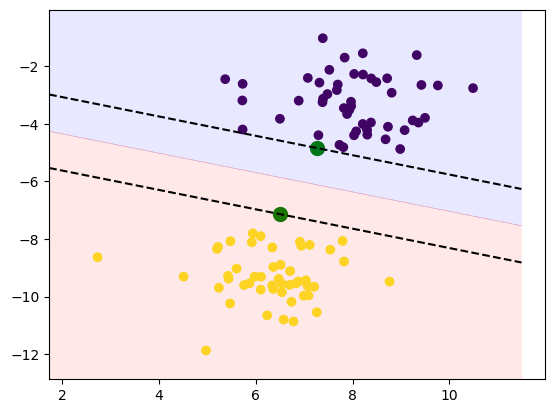

In [3]:

# Load dataset
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=6)

# Fit SVM
clf = SVC(kernel='linear', C=1.0)
clf.fit(X, y)

pred = clf.predict(X)
print(X,pred)

x_min , x_max = X[:,0].min()-1,X[:,0].max()+1
y_min , y_max = X[:,1].min()-1,X[:,1].max()+1

plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis')

plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],c='g',s=100)

xx , yy = np.meshgrid(np.arange(x_min,x_max,0.01),np.arange(y_min,y_max,0.01))
z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

# Plot parallel lines at margin distance
w = clf.coef_[0]
b = clf.intercept_[0]

# Margin lines (w.x + b = 1 and w.x + b = -1)
x_line = np.linspace(x_min, x_max, 100)
y_line_1 = -(w[0] * x_line + b - 1) / w[1]
y_line_2 = -(w[0] * x_line + b + 1) / w[1]

# Plot the margin lines
plt.plot(x_line, y_line_1, 'k--', label='Margin +1')
plt.plot(x_line, y_line_2, 'k--', label='Margin -1')

plt.contourf(xx,yy,z,cmap='bwr',alpha=0.1)


In [5]:
dir(np)

['ALLOW_THREADS',
 'BUFSIZE',
 'CLIP',
 'DataSource',
 'ERR_CALL',
 'ERR_DEFAULT',
 'ERR_IGNORE',
 'ERR_LOG',
 'ERR_PRINT',
 'ERR_RAISE',
 'ERR_WARN',
 'FLOATING_POINT_SUPPORT',
 'FPE_DIVIDEBYZERO',
 'FPE_INVALID',
 'FPE_OVERFLOW',
 'FPE_UNDERFLOW',
 'False_',
 'Inf',
 'Infinity',
 'MAXDIMS',
 'MAY_SHARE_BOUNDS',
 'MAY_SHARE_EXACT',
 'NAN',
 'NINF',
 'NZERO',
 'NaN',
 'PINF',
 'PZERO',
 'RAISE',
 'RankWarning',
 'SHIFT_DIVIDEBYZERO',
 'SHIFT_INVALID',
 'SHIFT_OVERFLOW',
 'SHIFT_UNDERFLOW',
 'ScalarType',
 'True_',
 'UFUNC_BUFSIZE_DEFAULT',
 'UFUNC_PYVALS_NAME',
 'WRAP',
 '_CopyMode',
 '_NoValue',
 '_UFUNC_API',
 '__NUMPY_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__config__',
 '__deprecated_attrs__',
 '__dir__',
 '__doc__',
 '__expired_functions__',
 '__file__',
 '__former_attrs__',
 '__future_scalars__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_add_newdoc_ufunc',
 '_builtins',
 '_distributor_init',
 '_financi

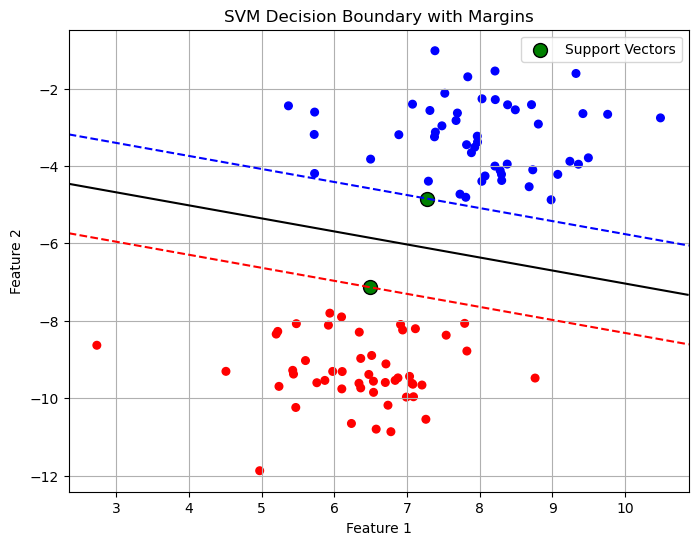

In [7]:

# Plotting
plt.figure(figsize=(8,6))

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=30)

# Plot support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
            linewidth=1, facecolors='g', edgecolors='k', label='Support Vectors')

# Get hyperplane and margin
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()


# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)


YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
plt.contour(XX, YY, Z, levels=[-1, 0, 1], colors=['blue', 'black', 'red'],
            linestyles=['--', '-', '--'])

plt.title("SVM Decision Boundary with Margins")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()
